In [93]:
import pandas as pd
import altair as alt
from models import IngredientMatcher
from models import SeasonalityChecker

# Chemin du dossier contenant les fichiers CSV


chemin = 'data/dico_all_month_ingredient'


# Chargement des données pour chaque mois
dico_all_month_ingredient = {}

for i in range(1, 13):
    # Lecture du CSV en gardant l'ordre d'origine
    dico_all_month_ingredient[i] = pd.read_csv(chemin + str(i) + '.csv')
    dico_all_month_ingredient[i].columns = ['ingredients', 'apparences', 'freq']
    
dico_all_month_ingredient_test={}
for i in range(1, 13):
    dico_all_month_ingredient_test[i]= dico_all_month_ingredient[i]
    dico_all_month_ingredient_test[i] = dico_all_month_ingredient_test[i].set_index('ingredients')
    dico_all_month_ingredient_test[i].index.name = None  
    


df_recipes_tokenised = pd.read_json("data/data_recipes_tokenised.json", orient="records")
df_recipes_tokenised['submitted'] = pd.to_datetime(df_recipes_tokenised['submitted'])


In [94]:
matcher = IngredientMatcher(df_recipes_tokenised,dico_all_month_ingredient_test)
matcher.ingredient_std('pepper')

(array([[0.99842718],
        [0.99389655],
        [0.95251502],
        [0.9674355 ],
        [1.        ],
        [0.99695624],
        [0.98360378],
        [0.99697003],
        [0.97271003],
        [0.93162498],
        [0.9138315 ],
        [0.83352467]]),
 [np.float64(0.04715430542857913), 12])

In [95]:
result_recipes,resul_ingredient=matcher.seasonal_recommendations_1('peach',3)[0],matcher.seasonal_recommendations_1('peach',3)[1]
result_recipes,resul_ingredient

([20746, 64945, 113826, 115463, 132855], ['yogurt', 'strawberry', 'blueberry'])

In [96]:
df_recipes_tokenised.loc[result_recipes,'name'].reset_index(drop=True)

0                booberry yogo smoothie
1                 finnish berry dessert
2     one muffin recipe7 different ways
3               organic yogurt smoothie
4    red  white  and blueberry smoothie
Name: name, dtype: object

In [97]:
dico_fraise = matcher.ingredient_match('strawberry',5)
dico_fraise
sorted_dict = dict(sorted(dico_fraise.items(), key=lambda item: item[1], reverse=True))
sorted_dict


{'strawberry': 588,
 'sugar': 417,
 'juice': 199,
 'cream': 155,
 'water': 136,
 'salt': 119,
 'butter': 112,
 'cheese': 110,
 'flour': 91,
 'milk': 90,
 'extract': 88,
 'egg': 88,
 'oil': 63,
 'banana': 60,
 'powder': 55,
 'yogurt': 55,
 'blueberry': 47,
 'cornstarch': 47,
 'cinnamon': 45,
 'vinegar': 45,
 'honey': 43,
 'vanilla': 39,
 'pepper': 37,
 'soda': 37,
 'mix': 35,
 'gelatin': 31,
 'orange': 31,
 'syrup': 31,
 'onion': 27,
 'of': 26,
 'cube': 26,
 'leaf': 25,
 'liqueur': 25,
 'whip': 25,
 'raspberry': 25,
 'pineapple': 24,
 'almond': 23,
 'topping': 23,
 'fruit': 22,
 'rhubarb': 22,
 'grape': 22,
 'white': 21,
 'concentrate': 21,
 'wine': 20,
 'walnut': 20,
 'coconut': 18,
 'seed': 18,
 'shell': 17,
 'apple': 17,
 'lettuce': 17,
 'pecan': 17,
 'cake': 16,
 'ice': 16,
 'peach': 15,
 'green': 15,
 'lemon': 15,
 'chip': 15,
 'substitute': 14,
 'jam': 14,
 'mustard': 14,
 'kiwi': 14,
 'mango': 14,
 'chunk': 14,
 'buttermilk': 13,
 'zest': 13,
 'rum': 13,
 'chocolate': 13,
 'crust

In [98]:
for ing in sorted_dict:
    print(ing,sorted_dict[ing],matcher.ingredient_std(ing)[1][0])

strawberry 588 0.22421985780472514
sugar 417 0.0544824301336608
juice 199 0.09233371077557029
cream 155 0.024939091897317224
water 136 0.01141076080168744
salt 119 0.011738825051728284
butter 112 0.0627002377535759
cheese 110 0.03955852535544898
flour 91 0.06876675126122411
milk 90 0.0483523801299309
extract 88 0.09099634838003887
egg 88 0.04836014712439762
oil 63 0.05777852891153815
banana 60 0.09746149427346104
powder 55 0.03526060460995081
yogurt 55 0.15450809369808619
blueberry 47 0.223182468777298
cornstarch 47 0.0669399305769672
cinnamon 45 0.09814272987972955
vinegar 45 0.11024121133348538
honey 43 0.09136824362615338
vanilla 39 0.11238007984291588
pepper 37 0.04715430542857913
soda 37 0.0910407159679644
mix 35 0.0782871069062026
gelatin 31 0.08872086704290406
orange 31 0.09516647198464863
syrup 31 0.10308446185822538
onion 27 0.03550256091824871
of 26 0.0751480946538925
cube 26 0.08175626678054307
leaf 25 0.06604458577824955
liqueur 25 0.1429358287352387
whip 25 0.0673804432648

In [99]:
matcher.ingredient_std('salt')[1][0]

np.float64(0.011738825051728284)

In [100]:
dico_all_month_ingredient[1]

,ingredients,apparences,freq
0,nbre_ingredient,153802.0,911.959680
1,nbre_recipe,16865.0,100.000000
2,pepper,9024.0,53.507264
3,salt,7599.0,45.057812
4,onion,6189.0,36.697302
...,...,...,...
927,cassi,1.0,0.005929
928,crawfish,1.0,0.005929
929,melt,1.0,0.005929
930,bagoong,1.0,0.005929


In [101]:
seasoner_checker = SeasonalityChecker(dico_all_month_ingredient_test)
seasoner_checker.is_seasonal('salt')
matcher.ingredient_std('salt')

(array([[0.99485718],
        [0.96548664],
        [0.98108363],
        [0.98181934],
        [0.98355527],
        [0.99024086],
        [0.95638211],
        [0.98227771],
        [0.97219591],
        [1.        ],
        [0.98343935],
        [0.99014742]]),
 [np.float64(0.011738825051728284), 12])

In [102]:
def ingredient_score(ingredient):

    std_result = matcher.ingredient_std(ingredient)
    
    if isinstance(std_result[1], (list, tuple)) and len(std_result[1]) > 1:
        nbre_month = std_result[1][1]
    else:
        nbre_month = std_result[1] 

    if nbre_month < 12:
        return nbre_month
        
    else:
        return std_result[1][0]
    
ingredient_score('fefefeffe')

0

In [126]:
vinegare_score=[]
for i in range (1,13):
    dico_all_month_ingredient[i]['score']  =  dico_all_month_ingredient[i].ingredients.apply(lambda x : ingredient_score(x))
    dico_all_month_ingredient[i].iloc[:1].score.values
    vinegare_score.append(  dico_all_month_ingredient[i][dico_all_month_ingredient[i].score > 0.1].iloc[:1].score.values)


In [127]:
vinegare_score ,max(vinegare_score)

([array([0.11024121]),
  array([0.11024121]),
  array([0.11024121]),
  array([0.11024121]),
  array([0.11024121]),
  array([0.11024121]),
  array([0.11024121]),
  array([0.11024121]),
  array([0.11024121]),
  array([0.11024121]),
  array([0.11024121]),
  array([0.11238008])],
 array([0.11238008]))

In [124]:
selected_month = 3
top = 10
df_selected_month = dico_all_month_ingredient[selected_month]
df_selected_month
#df_selected_month = df_selected_month[df_selected_month.score > 0.1]
df_selected_month.iloc[:top]

,ingredients,apparences,freq,score
0,nbre_ingredient,143712.0,900.789771,0.006831
1,nbre_recipe,15954.0,100.000000,0.000000
2,pepper,8144.0,51.046759,0.047154
3,salt,7089.0,44.433998,0.011739
4,sugar,6029.0,37.789896,0.054482
5,oil,5525.0,34.630814,0.057779
6,onion,5450.0,34.160712,0.035503
7,cheese,5258.0,32.957252,0.039559
8,butter,4864.0,30.487652,0.062700
9,flour,3931.0,24.639589,0.068767


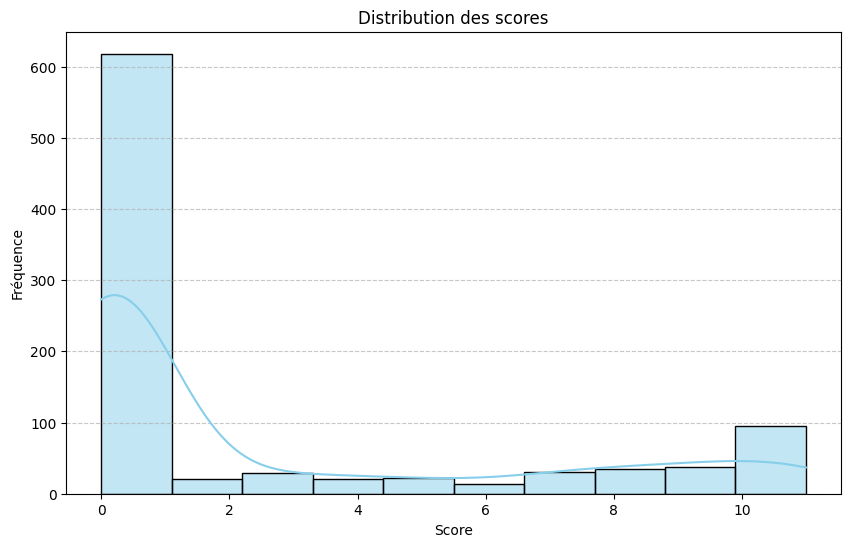

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.histplot(df_selected_month['score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution des scores')
plt.xlabel('Score')
plt.ylabel('Fréquence')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()